In [1]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

In [2]:
def plot_image(img: np.array):
    plt.figure(figsize = (6,6))
    plt.imshow(img, cmap = "gray")

def plot_two_images(img1: np.array, img2: np.array):
    _, ax = plt.subplots(1, 2, figsize = (12, 6))
    ax[0].imshow(img1, cmap = "gray")
    ax[1].imshow(img2, cmap = "gray")

## Padding 
**formula for padding dim = (F-S)/2 (F is filter size, S is stride size)**

https://analyticsindiamag.com/guide-to-different-padding-methods-for-cnn-models/

- Padding is just a border added to the image matrix inorder to preserve the original image dimensions while convolution.
- Padding can be of different types;
    - Same padding : Here zeroes are added to the outer boundary of image
    - Causal padding : Usually used for 1-d squential data like time series.
    - Valid padding : Here valid padding also means no padding i.e we do not add any layer in the outer boundary. but it is   different from simple mode, as here we assume that all the pixel points including the corners are valid, whereas in case of simple mode we usually ignore corner pixels.

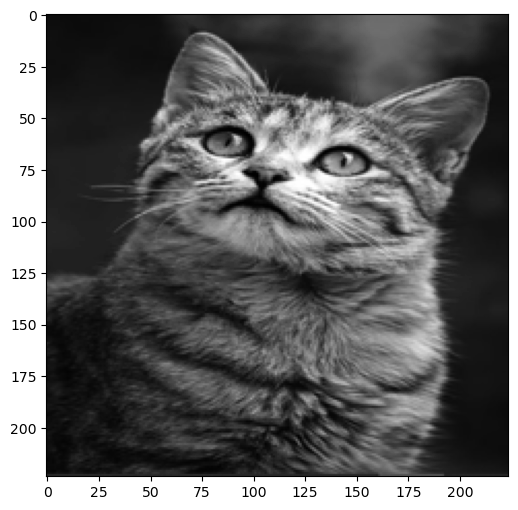

In [8]:
img = Image.open("images/cat.jpg")
img = ImageOps.grayscale(img)
img = img.resize(size = (224, 224))
plot_image(img)

In [52]:
def get_padding_size(kernel_size: int) -> int:
    return (kernel_size-1)//2

In [53]:
pad_3x3 = get_padding_size(3)
pad_3x3

1

In [54]:
pad_5x5 = get_padding_size(5)
pad_5x5

2

In [11]:
 ##here we have a square matrix i.e mxm thus we use image.shape[0], for mxn we can use image.shape[0] and image.shape[1] for width and height values
def add_padding_to_image(img: np.array, padding_size: int) -> np.array:
    img_with_padding = np.zeros(shape=(
    img.shape[0] + padding_size * 2,
    img.shape[0] + padding_size * 2))
    
    img_with_padding[padding_size : -padding_size, padding_size : -padding_size] = img
    return img_with_padding

(226, 226)


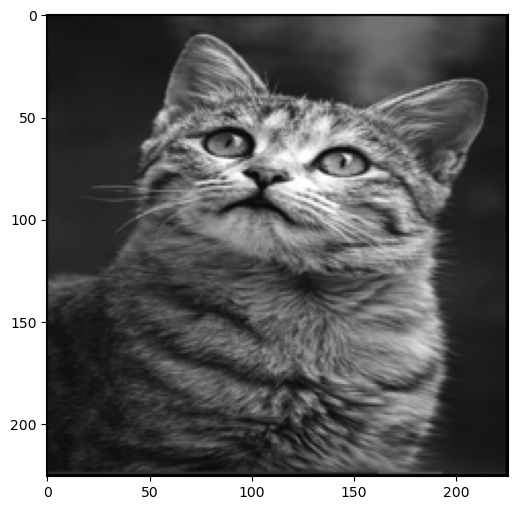

In [36]:
img_with_3x3_padding = add_padding_to_image(np.array(img), pad_3x3)
print(img_with_3x3_padding.shape);
plot_image(img_with_3x3_padding)

In [37]:
img_with_3x3_padding

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., 20., 20., ..., 42., 40.,  0.],
       [ 0., 21., 21., ..., 41., 39.,  0.],
       ...,
       [ 0., 22., 23., ..., 32., 31.,  0.],
       [ 0., 49., 49., ..., 45., 45.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

(228, 228)


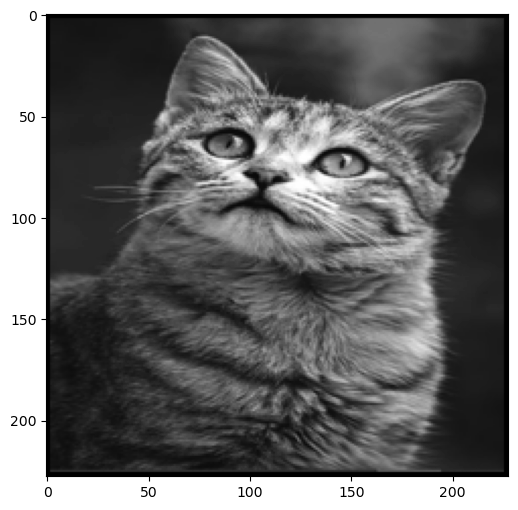

In [38]:
#5x5 kernel
img_with_5x5_padding = add_padding_to_image(np.array(img), pad_5x5)
print(img_with_5x5_padding.shape);
plot_image(img_with_5x5_padding)

We can see a black border surrounding the image, which is the padding layer that we added

### Applying convolution to padded image

In [31]:
outline = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])

In [33]:
def get_target_size(img_size : int, kernel_size : int) ->int:
    return img_size - kernel_size + 1

In [45]:
def convolution(img : np.array, kernel : np.array, tgt_size : int) ->np.array:
    convolved_img = np.zeros(shape = (tgt_size, tgt_size))
    k = kernel.shape[0]
    for i in range(tgt_size):
        for j in range(tgt_size):
            subset = np.array(img)[i: i+k, j: j+k]
            convolved_img[i, j] = np.sum(np.multiply(subset, kernel))
    return convolved_img

In [46]:
##Size of orginal image after convolution
tgt_size = get_target_size(np.array(img).shape[0], outline.shape[0])
tgt_size

222

In [47]:
##Size of padded image after convolution
tgt_size = get_target_size(np.array(img_with_3x3_padding).shape[0], outline.shape[0])
tgt_size

224

(224, 224)


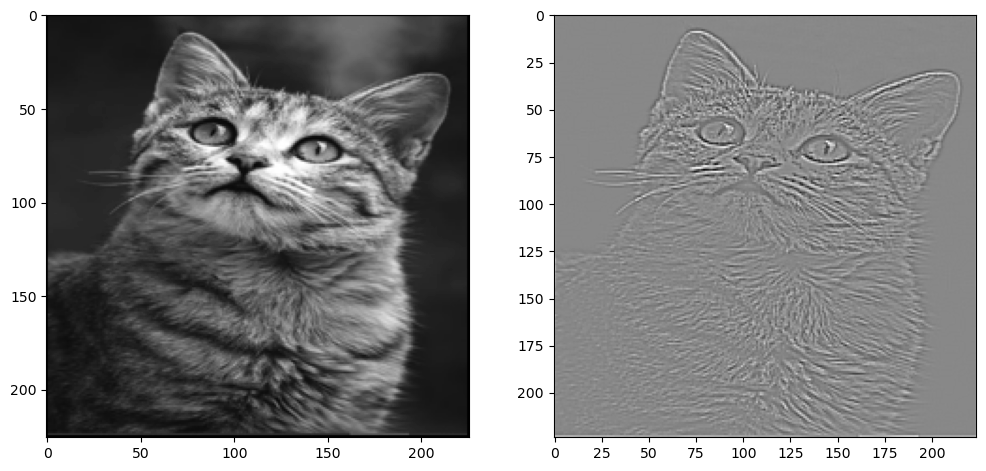

In [48]:
##Applying convolution using outline filter
convolved_img_3x3 = convolution(img_with_3x3_padding, outline, tgt_size)
print(convolved_img_3x3.shape)
plot_two_images(img_with_3x3_padding, convolved_img_3x3)

In [49]:
def negative_to_zero(img : np.array) -> np.array:
    img_neg_2_zero = img.copy()
    img_neg_2_zero[img_neg_2_zero < 0] = 0
    return img_neg_2_zero

(224, 224)


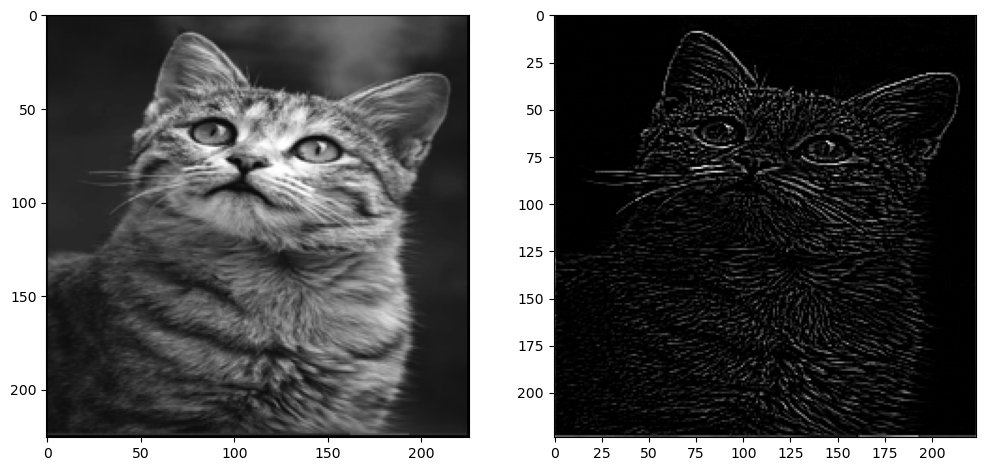

In [51]:
convolved_img_3x3 = negative_to_zero(convolved_img_3x3)
print(convolved_img_3x3.shape)
plot_two_images(img_with_3x3_padding, convolved_img_3x3)

Here we can say, shape of original image and convolved image is same because we added a padding layer to the image.

## Pooling

**Formula for target shape = ((m-p_shape)/s)+1 ; m = img_shape, p_shape = pooling_shape, s = strides**

https://towardsai.net/p/l/introduction-to-pooling-layers-in-cnn

- It is followed by the convolution layer, and is done to reduce the image dimensions by retaining the relevant information.
- Pooling is done by dividing the image in to smaller non-overlapping subsets called as pools.
- Pooling can be of different types;
    - Max pooling : Keeping the maximum value within the pool
    - Min pooling : Keeping the minimum value within the pool
    - Average pooling : Taking the average of all the values within the pool
    
## Strides

https://medium.com/machine-learning-algorithms/what-is-stride-in-convolutional-neural-network-e3b4ae9baedb
- Stride is how far the filter moves in every step along one direction

In [80]:
conv_input = np.array([
    [10, 12, 8, 7],
    [4, 11, 5, 9],
    [18, 13, 7, 7],
    [3, 15, 2, 2],
    [4, 5, 6, 8]])

In [84]:
pool_size = 2
stride = 2

for i in np.arange(conv_input.shape[0], step = stride):
    for j in np.arange(conv_input.shape[0], step = stride):
        mat = conv_input[i : i+pool_size, j : j + pool_size]
        if mat.shape == (pool_size, pool_size):
            print(mat)
    print()

[[10 12]
 [ 4 11]]
[[8 7]
 [5 9]]

[[18 13]
 [ 3 15]]
[[7 7]
 [2 2]]




In [85]:
def get_pools(img : np.array, pool_size : int, stride : int) -> np.array:
    pools = []
    
    for i in np.arange(img.shape[0], step = stride):
        for j in np.arange(img.shape[0], step = stride):
            mat = img[i: i + pool_size, j: j + pool_size]
            if mat.shape == (pool_size, pool_size):
                pools.append(mat)
    return np.array(pools)

In [86]:
pools = get_pools(conv_input, pool_size, stride)

In [87]:
def pooling(pools: np.array, method: str) -> np.array:
    num_pools = pools.shape[0]
    tgt_shape = (int(np.sqrt(num_pools)), int(np.sqrt(num_pools)))
    pooled = []
    
    for pool in pools:
        if method == "max":
            pooled.append(np.max(pool))
        
        if method == "min":
            pooled.append(np.min(pool))
        
        if method == "avg":
            pooled.append(np.average(pool))
    return np.array(pooled).reshape(tgt_shape)

In [88]:
pooling(pools, "max")

array([[12,  9],
       [18,  7]])

In [104]:
pools = get_pools(np.array(img), pool_size, stride)
max_pool_img = pooling(pools, "max")
print(np.array(img).shape, max_pool_img.shape)
print("Pooling Output Shape = ", ((np.array(img).shape[0] - pool_size)/ stride) + 1)

(224, 224) (112, 112)
Pooling Output Shape =  112.0


In [106]:
pools.shape

(12544, 2, 2)

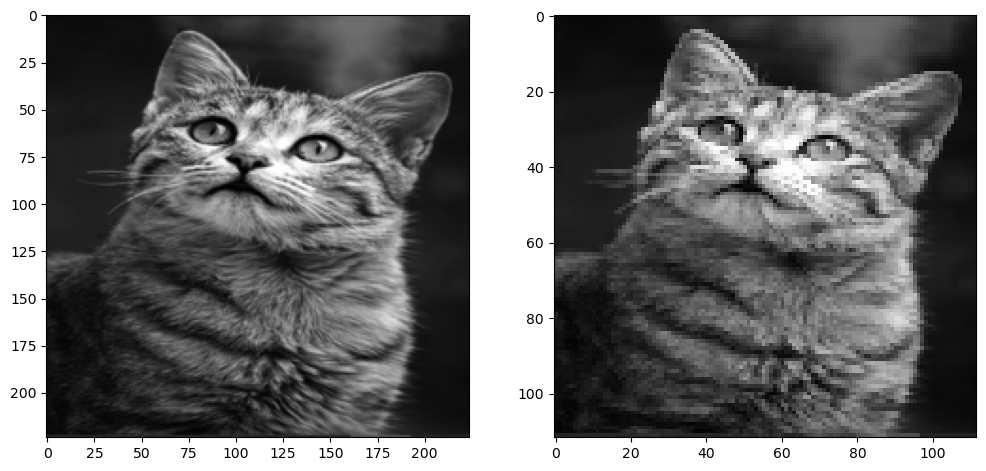

In [101]:
plot_two_images(img, max_pool_img)

(224, 224) (112, 112)


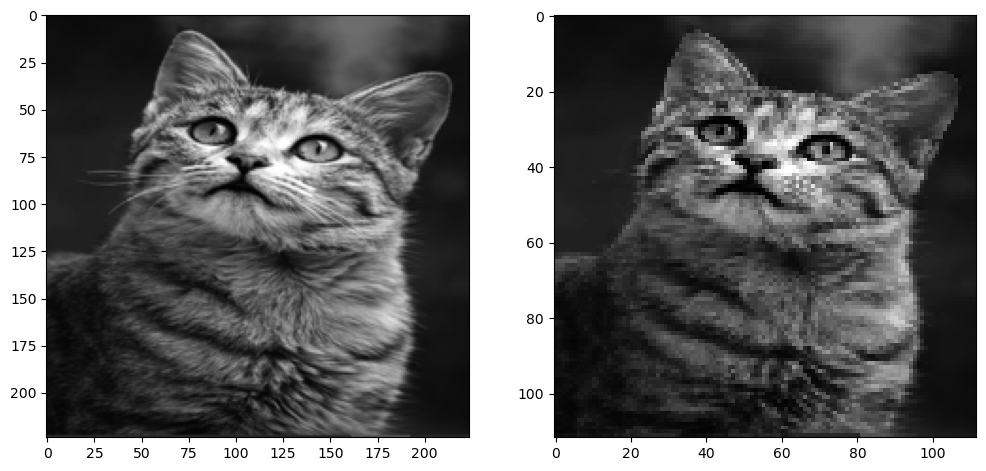

In [107]:
##Min pooling
min_pool_img = pooling(pools, "min")
print(np.array(img).shape, min_pool_img.shape)
plot_two_images(img, min_pool_img)

(224, 224) (112, 112)


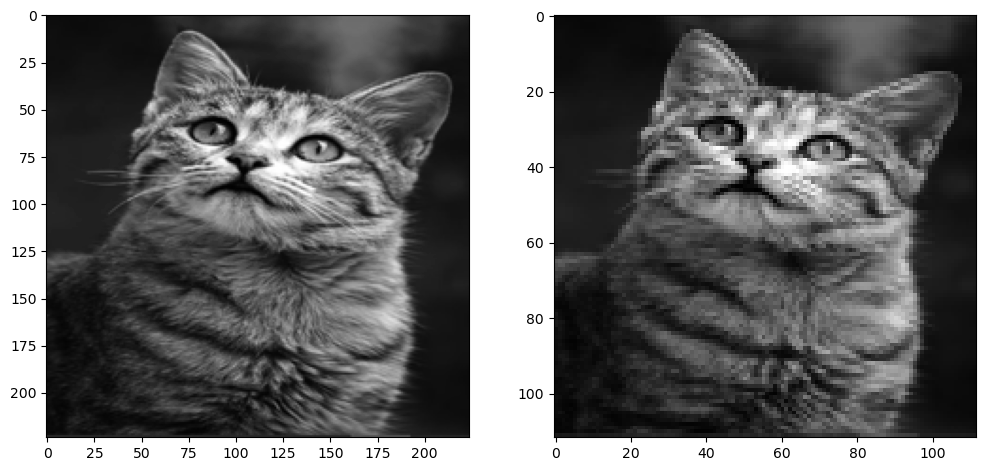

In [109]:
##Average Pooling
avg_pool_img = pooling(pools, "avg")
print(np.array(img).shape, avg_pool_img.shape)
plot_two_images(img, avg_pool_img)

## Verify in Tensorflow

In [110]:
import tensorflow as tf

In [111]:
model = tf.keras.Sequential([tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2)])
img_reshaped = np.array(img).reshape(1, 224, 224, 1)
img_reshaped.shape

(1, 224, 224, 1)

In [113]:
max_pooled_img = model.predict(img_reshaped)

1/1 [==============================] - 0s 12ms/step


In [116]:
max_pooled_img.shape

(1, 112, 112, 1)

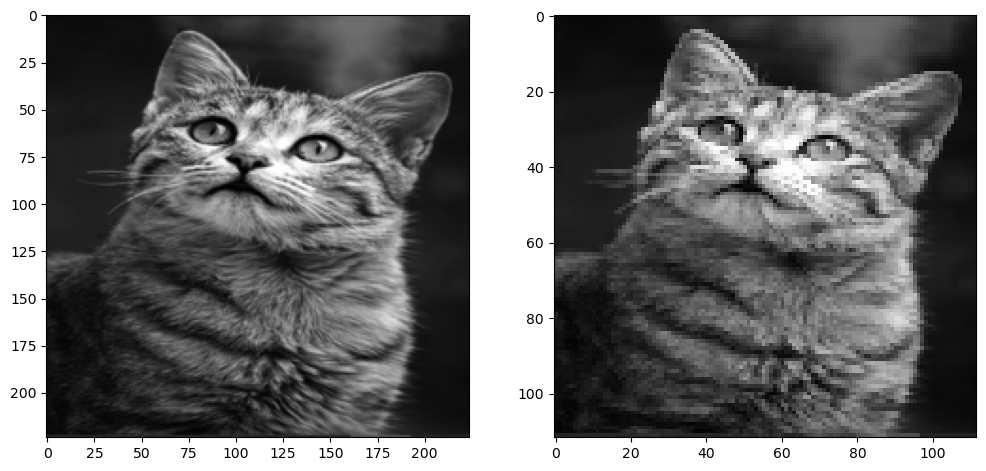

In [115]:
plot_two_images(img, max_pooled_img.reshape(112, 112))